In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [82]:
data = pd.read_csv('RNN - level 1 - movie.csv')

In [83]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [85]:
for i in range(3):
    print(data.text[i])
    print('\n')

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.


When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that

C:\Users\Jaseem Shaikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

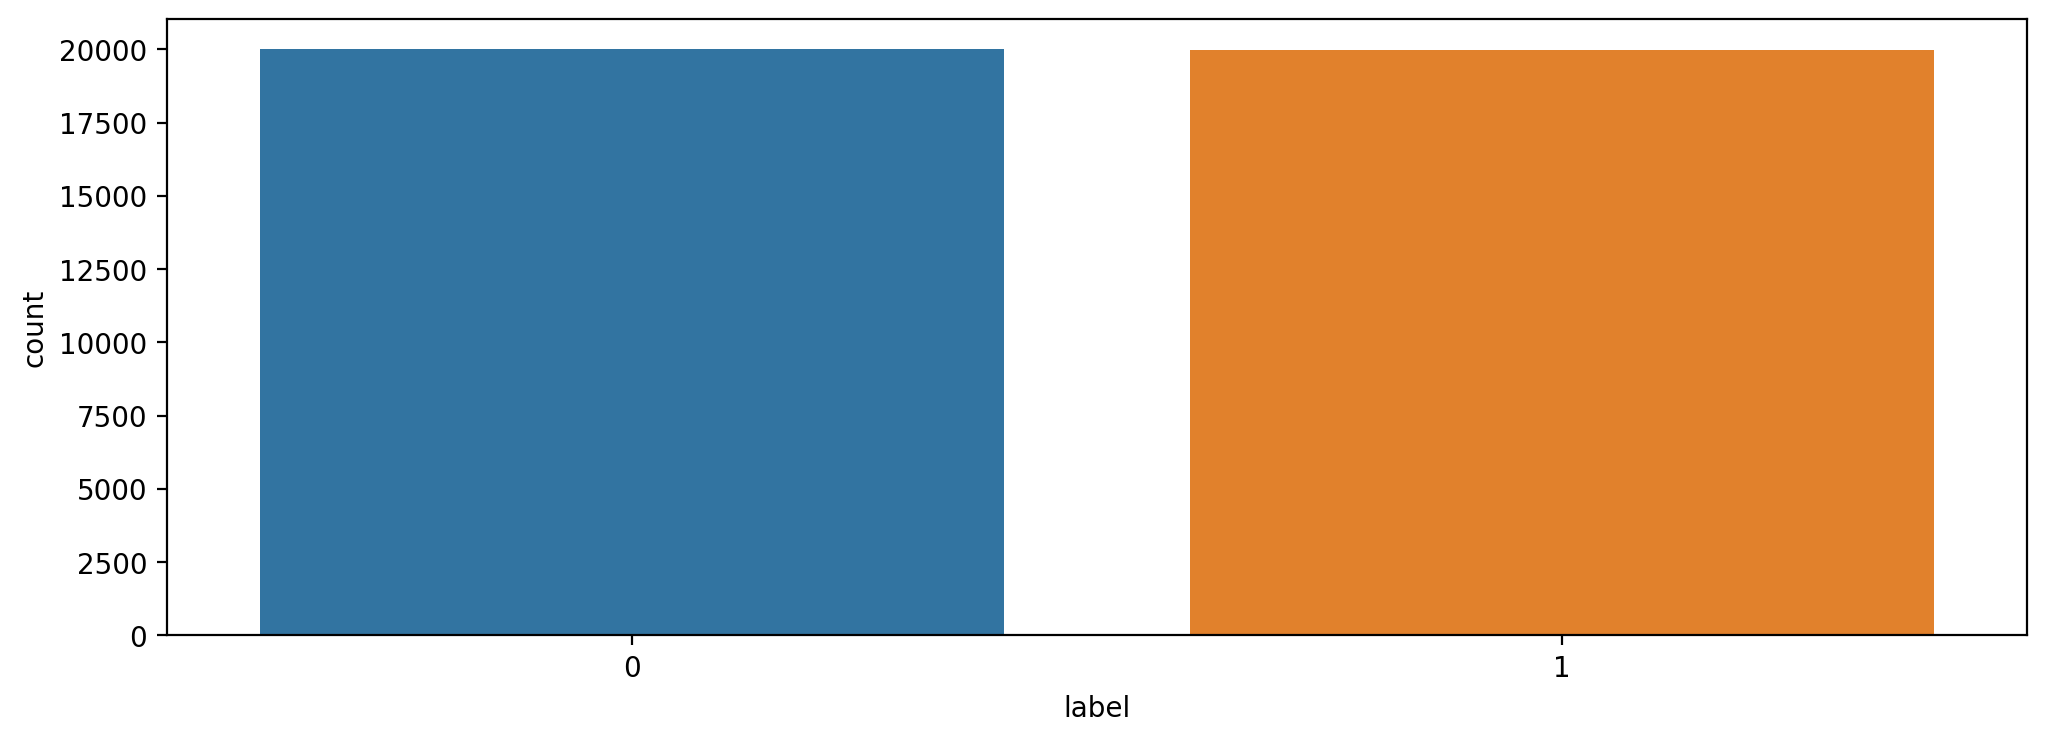

In [86]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['label'])

In [87]:
X = data[['text']]

In [88]:
Y = data[['label']]

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [90]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (32000, 1)
Training labels shape :  (32000, 1)
Testing data shape    :  (8000, 1)
Testing labels shape  :  (8000, 1)


In [91]:
training_sentences = x_train.text.tolist()
training_labels = y_train.label.tolist()
testing_sentences = x_test.text.tolist()
testing_labels = y_test.label.tolist()

In [92]:
print(training_sentences[0])
print('\n')
print(training_labels[0])
print('\n')
print(testing_sentences[0])
print('\n')
print(testing_labels[0])
print('\n')

Let's go straight to the point: this is The Movie I would take with me on a desert island (with dvd player). It's just perfect. If a reason for you to see a movie is that you love the actors, you like to see them free to involve in the space and feelings, this movie is for you. See the scene when Myrtle (Rowlands) come on stage drunk and Maurice(Cassavetes) has to improvise because she doesn't follow the script anymore. If you're sensitive to the camera's movements, you'll be fascinated by the way the camera moves on stage, the particular flow, that give you the impression camera follow the actors as if it was lead by the theatrical principle of "private space"... amazing. And the story is just a brilliant mix of tale and realistic drama. Cassavetes is again arguing with Hollywood and the majors' politics, but this time, he do it through Broadway, making one of the most exciting movie about theater. Well, this movie is a bliss.


1


A variation of the same plot line was used in a Simo

In [93]:
training_labels = np.array(training_labels)
testing_labels  = np.array(testing_labels)

In [94]:
training_labels[:5]

array([1, 0, 0, 0, 1])

In [95]:
testing_labels

array([1, 1, 1, ..., 0, 1, 1])

In [96]:
print('Total reviews for training : ', len(training_sentences))
print('Total training labels      : ', len(training_labels))
print('Total reviews for testing  : ', len(testing_sentences))
print('Total testing labels       : ', len(testing_labels))

Total reviews for training :  32000
Total training labels      :  32000
Total reviews for testing  :  8000
Total testing labels       :  8000


In [97]:
max_len = 150
trunc_type = 'post'
pad_type = 'pre'
vocab_size = 10000
embedding_dim = 16

In [98]:
# Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '#OOV')
tokenizer.fit_on_texts(testing_sentences)

In [103]:
# Sequencing
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences  = tokenizer.texts_to_sequences(testing_sentences)

In [104]:
# Padding
padded_training_sequences = pad_sequences(training_sequences, maxlen = max_len, padding = pad_type, truncating = trunc_type)
padded_testing_sequences  = pad_sequences(testing_sequences, maxlen = max_len, padding = pad_type, truncating = trunc_type)

In [105]:
print('Training data shape   : ', padded_training_sequences.shape)
print('Training labels shape : ', training_labels.shape)
print('Testing data shape    : ', padded_testing_sequences.shape)
print('Testing labels shape  : ', testing_labels.shape)

Training data shape   :  (32000, 150)
Training labels shape :  (32000,)
Testing data shape    :  (8000, 150)
Testing labels shape  :  (8000,)


# Training an LSTM model

In [106]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM

model = tf.keras.Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_len))
model.add(Bidirectional(LSTM(32)))

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 173601 (678.13 KB)
Trainable params: 173601 (678.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [108]:
history = model.fit(
        padded_training_sequences,
        training_labels,
        validation_data = (padded_testing_sequences, testing_labels),
        epochs = 20
)

Epoch 1/20
1000/1000 [==============================] - 70s 67ms/step - loss: 0.4386 - accuracy: 0.7859 - val_loss: 0.3422 - val_accuracy: 0.8521
Epoch 2/20
1000/1000 [==============================] - 66s 66ms/step - loss: 0.2802 - accuracy: 0.8872 - val_loss: 0.3438 - val_accuracy: 0.8549
Epoch 3/20
1000/1000 [==============================] - 68s 68ms/step - loss: 0.2230 - accuracy: 0.9131 - val_loss: 0.3528 - val_accuracy: 0.8556
Epoch 4/20
1000/1000 [==============================] - 65s 65ms/step - loss: 0.1770 - accuracy: 0.9323 - val_loss: 0.4170 - val_accuracy: 0.8510
Epoch 5/20
1000/1000 [==============================] - 66s 66ms/step - loss: 0.1324 - accuracy: 0.9506 - val_loss: 0.4935 - val_accuracy: 0.8405
Epoch 6/20
1000/1000 [==============================] - 71s 71ms/step - loss: 0.1001 - accuracy: 0.9633 - val_loss: 0.5636 - val_accuracy: 0.8330
Epoch 7/20
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0780 - accuracy: 0.9727 - val_loss: 0.6414 -

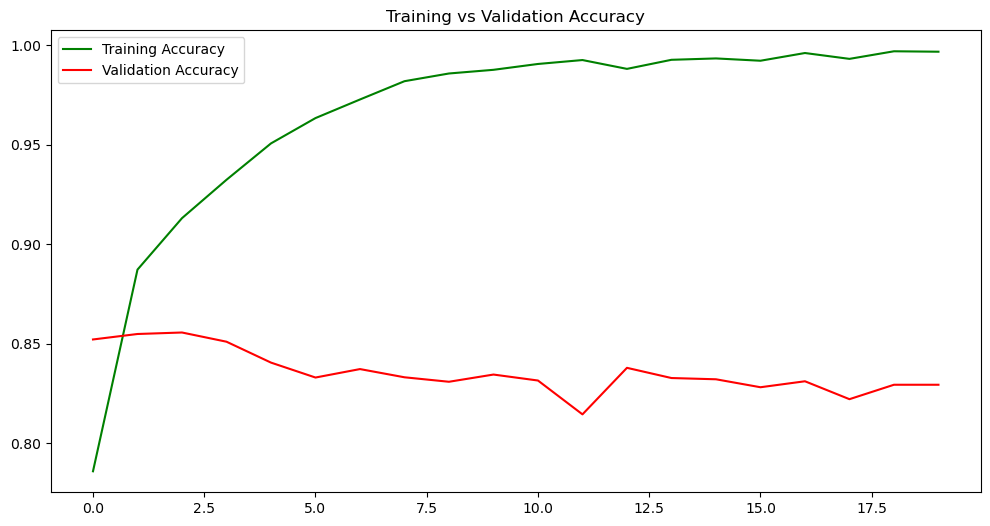

In [109]:
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

plt.figure(figsize = (12,6), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

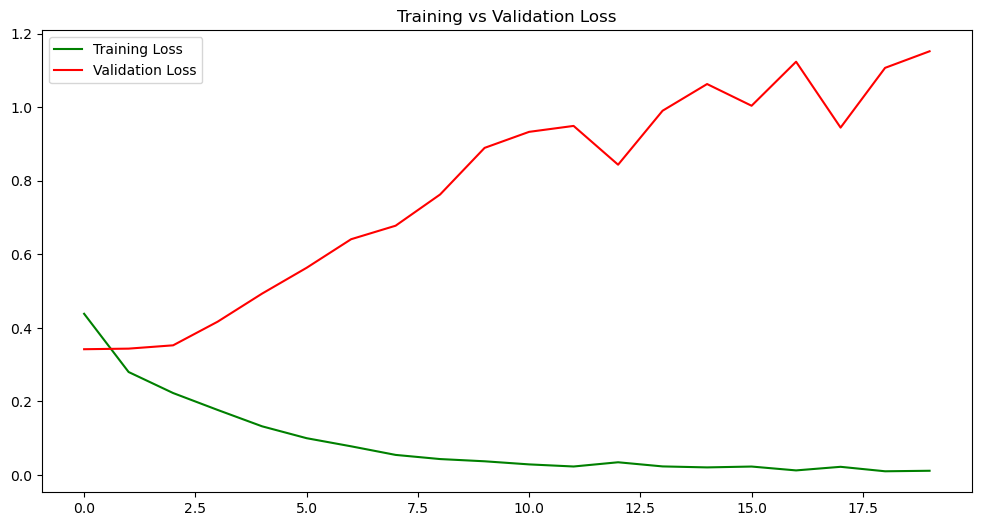

In [110]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

plt.figure(figsize = (12,6), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

In [111]:
model.predict(padded_testing_sequences[:5])

1/1 [==============================] - 1s 911ms/step


array([[4.578688e-04],
       [9.999859e-01],
       [8.664387e-01],
       [9.999275e-01],
       [9.999988e-01]], dtype=float32)